In [66]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout, GRU, Reshape
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [67]:
X_train = np.load('training_data\specs_train_processed.npy')
print(f"before: {X_train.shape}")
X_train = np.swapaxes(X_train,2,1)
print(f"after: {X_train.shape}")
X_train = np.expand_dims(X_train,3)
print(f"final: {X_train.shape}")
y_train = np.load('training_data\labels_train_processed.npy')

before: (7983, 100, 130)
after: (7983, 130, 100)
final: (7983, 130, 100, 1)


In [68]:
N_CLASSES = 10
model = Sequential(name="gtzan_crnn")

# Convolutional Block 1
model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=X_train.shape[1:])) # X_train holds the processed training spectrograms
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

# Convolutional Block 2
model.add(Conv2D(filters=32, kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

# # Convolutional Block 3
# model.add(Conv2D(filters=64, kernel_size=(3,3)))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(BatchNormalization())

# # Convolutional Block 4
# model.add(Conv2D(filters=128, kernel_size=(3,3)))
# model.add(MaxPool2D(pool_size=(1,5)))
# model.add(BatchNormalization())

# Reshape Layer (effectively squeezes the frequency dimension away)
model.add(Reshape((31,736)))

# Recurrent Layer
model.add(GRU(256, return_sequences=False, activation="tanh"))

# Dense Layer
model.add(Dense(64))
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(N_CLASSES, activation="softmax"))

In [69]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [70]:
x_valid = np.load('training_data\specs_val_processed.npy')
x_valid = np.swapaxes(x_valid,2,1)
x_valid = np.expand_dims(x_valid,3)
y_valid = np.load('training_data\labels_val_processed.npy')

In [71]:
model.fit(X_train, y_train, epochs = 25, validation_data = (x_valid, y_valid), batch_size=64)

Epoch 1/25
125/125 [==============================] - 12s 45ms/step - loss: 1.9200 - accuracy: 0.3203 - val_loss: 2.6562 - val_accuracy: 0.1022
Epoch 2/25
125/125 [==============================] - 5s 41ms/step - loss: 1.4484 - accuracy: 0.4932 - val_loss: 2.9544 - val_accuracy: 0.1984
Epoch 3/25
125/125 [==============================] - 5s 42ms/step - loss: 1.2219 - accuracy: 0.5774 - val_loss: 2.9504 - val_accuracy: 0.2368
Epoch 4/25
125/125 [==============================] - 4s 36ms/step - loss: 1.0610 - accuracy: 0.6411 - val_loss: 2.2997 - val_accuracy: 0.3259
Epoch 5/25
125/125 [==============================] - 4s 35ms/step - loss: 0.9296 - accuracy: 0.6862 - val_loss: 1.3722 - val_accuracy: 0.5152
Epoch 6/25
125/125 [==============================] - 4s 36ms/step - loss: 0.8138 - accuracy: 0.7268 - val_loss: 1.1839 - val_accuracy: 0.5870
Epoch 7/25
125/125 [==============================] - 4s 36ms/step - loss: 0.7311 - accuracy: 0.7614 - val_loss: 1.1570 - val_accuracy: 0.605

In [72]:
x_test = np.load('training_data\specs_test_processed.npy')
x_test = np.swapaxes(x_test,2,1)
x_test = np.expand_dims(x_test,3)
y_test = np.load('training_data\labels_test_processed.npy')

In [73]:
model.evaluate(x=x_test, y=y_test)


32/32 [==============================] - 0s 11ms/step - loss: 1.6220 - accuracy: 0.7307


[1.6220269203186035, 0.7306930422782898]

## Confusion Matrix

In [74]:
genres = {
 0:'blues',
 1:'classical',
 2:'country',
 3:'disco',
 4:'hiphop',
 5:'jazz',
 6:'metal',
 7:'pop',
 8:'reggae',
 9:'rock'
}

32/32 [==============================] - 1s 8ms/step


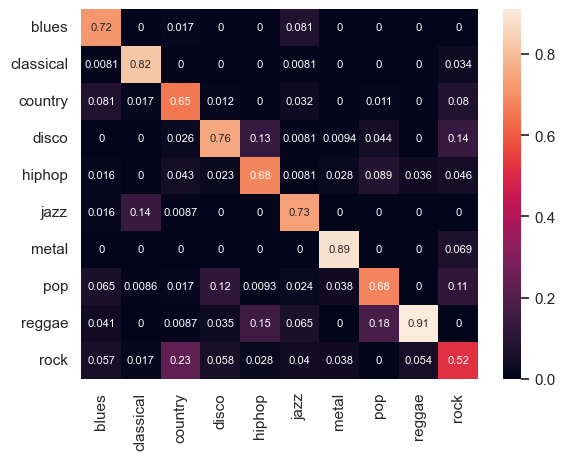

In [75]:

y_prediction = model.predict(x_test)
y_prediction = np.argmax (y_prediction, axis = 1)
result = confusion_matrix(y_test, y_prediction , normalize='pred')

df_cm = pd.DataFrame(result, (genres.values()), (genres.values()))
#plt.figure(figsize=(10,7))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}) # font size

plt.show()